# cygnus-naboo
Figures for Cygnus paper using new config (`cygnus`, 100M warmup + 200M sim)

Using new Naboo scripts to make things easier!

In [2]:
from collections import defaultdict
from importlib import reload
from matplotlib import colormaps
# from utils import plots, stats, tables, utils

from plot_utils import collate, plot

# Configuration

In [3]:
sim_dir = "/u/cmolder/GitHub/ChampSim/sim/"
baseline_study = "stu_test"
baseline_experiment = "_baseline"
weights_path = "/u/cmolder/GitHub/ChampSim/naboo/conf/weights.toml"

suites = [
    "all",
    "spec06",
    "spec17",
    "cloudsuite"
]
stats  = [
    "cpu.gmean.ipc_improvement",
]
dpi = 150
cmaps = {
    'Pythia': colormaps['Blues'],
    'Pythia-Ignore': colormaps['Purples'],
    'Pythia-Width': colormaps['Greys'],
    'Cygnus': colormaps['Reds'],
    'Cygnus-Ignore': colormaps['Greens'],
    'Cygnus-Width': colormaps['Oranges'],
}

In [4]:
reload(collate)
studies = {
    # Baseline
    "stu_test": collate.StudyCollator(sim_dir, "stu_test", 
                                      baseline_study=baseline_study, 
                                      baseline_experiment=baseline_experiment,
                                      weights_path=weights_path),
    # "stu_cygnus": collate.StudyCollator(sim_dir, "stu_cygnus",
    #                                     baseline_study=baseline_study, 
    #                                     baseline_experiment=baseline_experiment,
    #                                     weights_path=weights_path),
}

[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 707/707 [00:03<00:00, 204.26file/s]


[ipykernel_launcher][angrist-3] Generating benchmark stats for 38 benchmarks over 7 experiments:
    Benchmarks : sssp mcf 620.omnetpp astar bwaves lbm whiskey omnetpp 602.gcc soplex classifcation cloud9 649.fotonik3d 605.mcf charlie gcc leslie3d GemsFDTD libquantum zeusmp cc 623.xalancbmk 607.cactuBSSN xalancbmk 628.pop2 delta cactusADM nutch 627.cam4 619.lbm milc sphinx3 bc tc bfs merced cassandra pr
    Experiments: pf_spp pf_spp_ppf pf_bingo _baseline pf_sms pf_dspatch pf_mlop
        


[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 266/266 [00:02<00:00, 113.28it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 6 suites over 7 experiments:
    Suites     : cloudsuite google spec06 spec17 gap all
    Experiments: pf_spp pf_spp_ppf pf_bingo _baseline pf_sms pf_dspatch pf_mlop
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 42/42 [00:01<00:00, 23.58it/s]


# Plots

## Dynamic degree

In [5]:
degreedyn_1core_df = {
    # 'Cygnus':       studies['stu_cygnus']['pf_cygnus'],
    # 'Cygnus Depth': studies['stu_cygnus']['pf_cygnus'],
    # 'Pythia':       studies['stu_cygnus']['pf_cygnus'],

    'Bingo':   studies['stu_test']['pf_bingo'],
    'SMS':     studies['stu_test']['pf_sms'],
    'SPP':     studies['stu_test']['pf_spp'],
    'SPP+PPF': studies['stu_test']['pf_spp_ppf'],
    'MLOP':    studies['stu_test']['pf_mlop'],
    'DSPatch': studies['stu_test']['pf_dspatch'],
}
degreedyn_1core_colors = defaultdict(lambda: None, {
    'Cygnus':       colormaps['Set3'](0), #cmaps['Cygnus-Width'](0.65),
    'Cygnus Depth': colormaps['Set3'](1), #cmaps['Cygnus-Ignore'](0.65),
    'Pythia':       colormaps['Set3'](2), #cmaps['Pythia'](0.65),
    #'Pythia +Ignore':                    #cmaps['Pythia-Ignore'](0.65),
    #'Pythia Width':                      #cmaps['Pythia-Width'](0.5),

    'Bingo':    colormaps['Set3'](3), #'purple',
    'SMS':      colormaps['Set3'](4), #'royalblue',
    'SPP':      colormaps['Set3'](5), #'royalblue',
    'SPP+PPF':  colormaps['Set3'](6), #'darkturquoise',
    'MLOP':     colormaps['Set3'](7), #'deeppink',
    'DSPatch':  colormaps['Set3'](8), #'darkred',
    'BO-Width': colormaps['Set3'](9), #'gold',
})

degreedyn_1core_hatches = defaultdict(lambda: None, {
    # 'Pythia': '\\\\',
    # 'Pythia +Ignore': '\\\\',
    # 'Pythia-Width': '\\\\',

    # 'Cygnus Depth': '//',
    # 'Cygnus': '//',
    # 'Cygnus MSHRAware': '//',
    # 'Cygnus ActionPrio': '//',
    # 'Cygnus ActionPrio Max8': '//',
    # 'Cygnus Ideal': '//',
    
    # 'Bingo': '..',
    # 'MLOP': '-',
    # 'SPP': 'x',
    # 'SPP+PPF': 'x',
    # 'BO-Width': 'o',
})

degreedyn_1core_legend_kwargs = {
    'ncol': 4,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

degreedyn_1core_legend_kwargs_wide = {
    'ncol': 8,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

degreedyn_1core_label_kwargs = {
    'rotation': 0,
    'ha': 'center',
    'fontsize': 7,
}

### IPC improvement

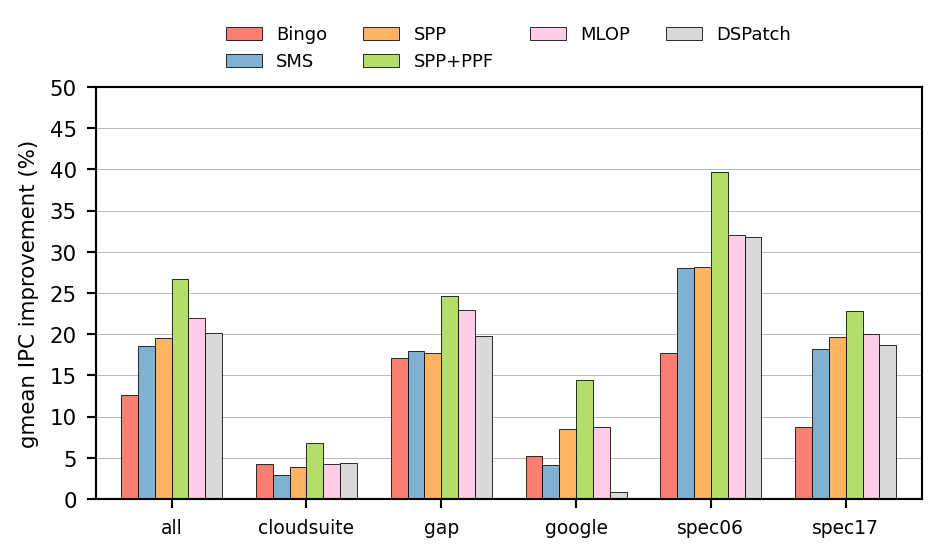

In [13]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='gmean IPC improvement (%)',
    ylim=(0, 50),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))

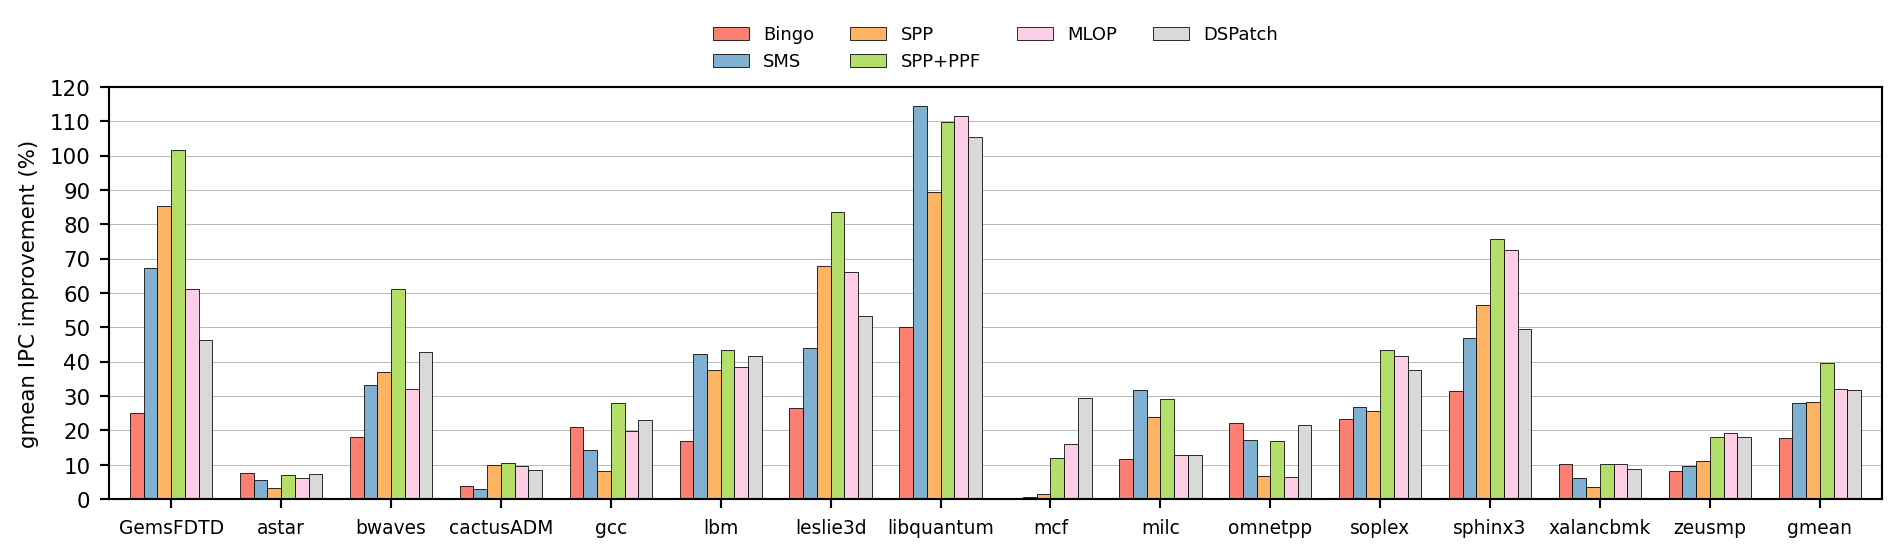

In [6]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='gmean IPC improvement (%)',
    ylim=(0, 120),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))
# import matplotlib.pyplot as plt
# plt.savefig('../../cvs/papers/micro-23r/figures/results_summary.pdf')

### L2C accuracy

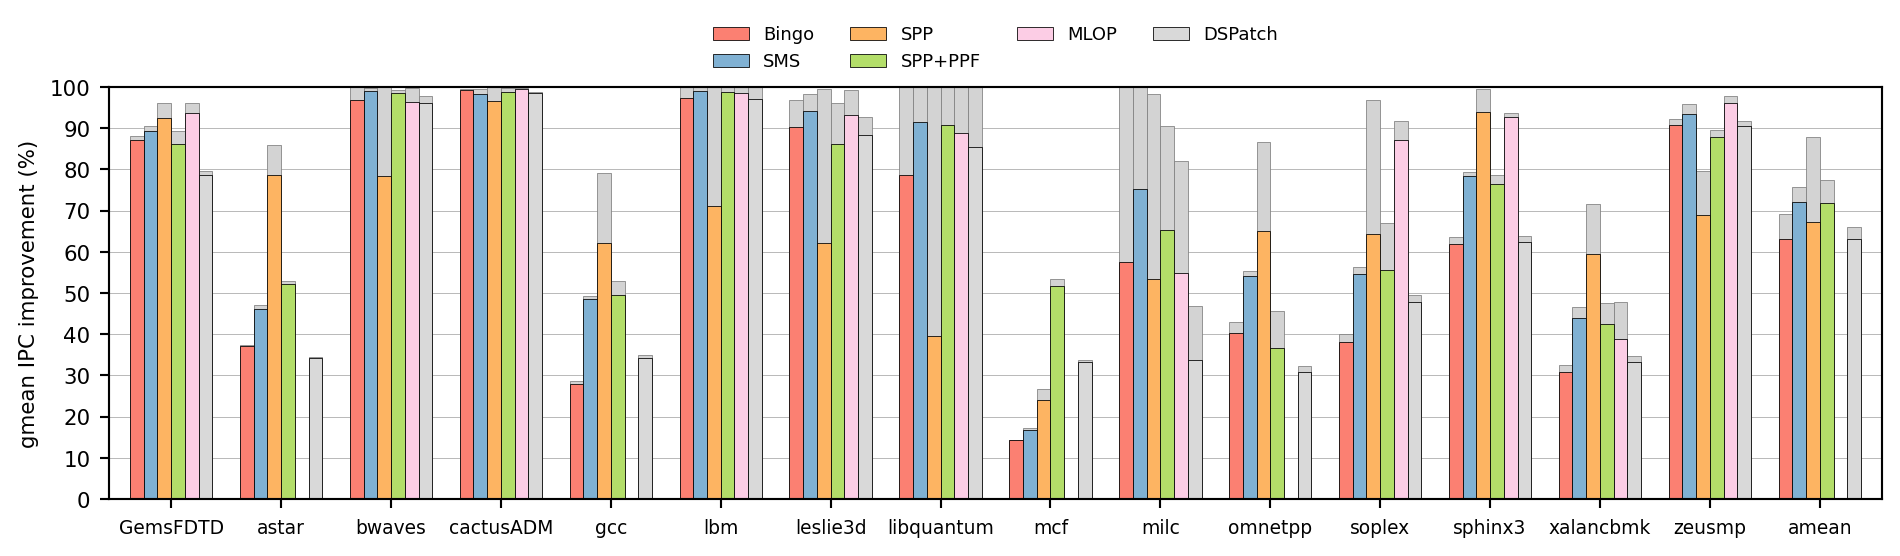

In [7]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_timely_accuracy",
    secondary_statistic_name="cache.L2C.amean.pf_accuracy",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='gmean IPC improvement (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))

### L2C coverage

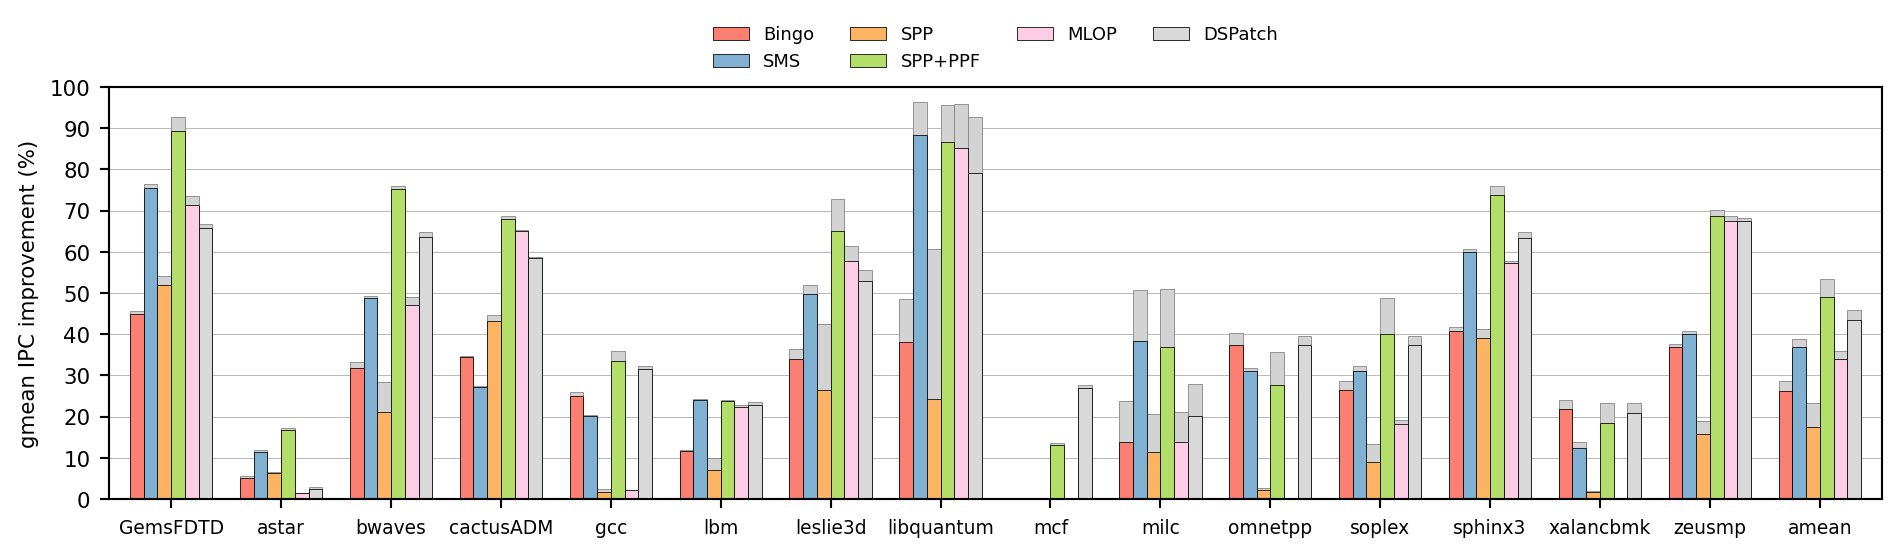

In [11]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_coverage",
    secondary_statistic_name="cache.L2C.amean.pf_untimely_coverage",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='gmean IPC improvement (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))